# Breast Cancer (Wisconsin) Dataset

### Data

Breast Cancer (Wisconsin) dataset is obtained from Kaggle: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

The dataset is a CSV file which contains a set of 159 records under 30 features and 1 Label Class: Diagnosis (M = malignant, B = benign)

### Goal

Build a machine learning model that predicts whether the cancer is benign or malignant.

## 1.0 Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


## 2.0 Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


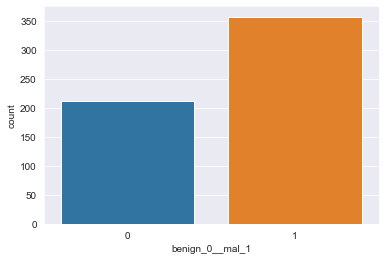

In [6]:
sns.set_style('darkgrid')
sns.countplot(x='benign_0__mal_1',data=df)

In [7]:
# There is no missing data
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

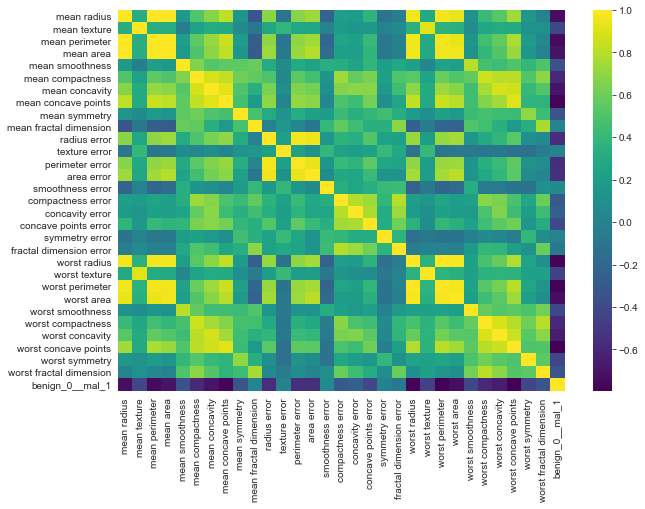

In [19]:
# Correlation between features
plt.figure(figsize=(10,7))

correlation = df.corr()
sns.heatmap(data=correlation, cmap='viridis')

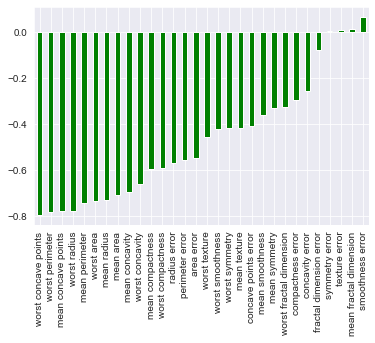

In [28]:
correlation = df.corr()['benign_0__mal_1'].sort_values()
correlation.drop('benign_0__mal_1').plot(kind='bar', color='green')

## 3.0 Build Predictive Model

### 3.1 Train Test Split

In [30]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 3.2 Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_train

array([[0.09555587, 0.15571988, 0.08686338, ..., 0.04784705, 0.281096  ,
        0.19498135],
       [0.28439585, 0.14832536, 0.27841891, ..., 0.20151567, 0.17090479,
        0.38877586],
       [0.22996829, 0.35319704, 0.21919701, ..., 0.23813297, 0.19120836,
        0.21100373],
       ...,
       [0.96734346, 0.67203132, 0.9889434 , ..., 0.904237  , 0.21210329,
        0.16302136],
       [0.28202944, 0.23270987, 0.27219957, ..., 0.28894247, 0.34141534,
        0.19752458],
       [0.38520517, 0.25489343, 0.38000138, ..., 0.43127799, 0.36467573,
        0.35910478]])

In [42]:
X_test = scaler.transform(X_test)
X_test

array([[0.11619102, 0.3262288 , 0.11077327, ..., 0.17402687, 0.17524147,
        0.22312648],
       [0.55984666, 0.3984341 , 0.53285882, ..., 0.44574578, 0.19751626,
        0.01975246],
       [0.36106773, 0.21183123, 0.33784811, ..., 0.20024113, 0.19022275,
        0.01619193],
       ...,
       [0.77093095, 0.48803828, 0.74846244, ..., 0.80812952, 0.39897497,
        0.31222448],
       [0.50967864, 0.74858634, 0.50798148, ..., 0.67860834, 0.27735068,
        0.30272974],
       [0.1930522 , 0.27403219, 0.18975883, ..., 0.32772993, 0.23950325,
        0.52356731]])

### 3.3 Create Neural Network Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [44]:
X_train.shape # Neural Network should have 30 input nodes to match the 30 features

(398, 30)

In [46]:
model = Sequential() # Sequential stack of layers using forward propagation

# Three layer ('densly connected') Neural Network

model.add(Dense(30,activation = 'relu'))      # Layer 1 (Input) - 30 units with Rectified Linear activation function 
model.add(Dense(30,activation = 'relu'))      # Layer 2 (hidden) - 15 units with Rectified Linear activation function 
model.add(Dense(1,activation = 'sigmoid'))   # Layer 3 (Output) - 1 units with Sigmoid activation function (0-1)

model.compile(loss='binary_crossentropy',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [47]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 3s 7ms/sample - loss: 0.6900 - val_loss: 0.6593
Epoch 2/600
398/398 [==============================] - 0s 322us/sample - loss: 0.6506 - val_loss: 0.6295
Epoch 3/600
398/398 [==============================] - 0s 296us/sample - loss: 0.6164 - val_loss: 0.5945
Epoch 4/600
398/398 [==============================] - 0s 261us/sample - loss: 0.5762 - val_loss: 0.5506
Epoch 5/600
398/398 [==============================] - 0s 261us/sample - loss: 0.5312 - val_loss: 0.5041
Epoch 6/600
398/398 [==============================] - 0s 216us/sample - loss: 0.4810 - val_loss: 0.4472
Epoch 7/600
398/398 [==============================] - 0s 244us/sample - loss: 0.4255 - val_loss: 0.3887
Epoch 8/600
398/398 [==============================] - 0s 226us/sample - loss: 0.3743 - val_loss: 0.3410
Epoch 9/600
398/398 [=

Epoch 75/600
398/398 [==============================] - 0s 163us/sample - loss: 0.0547 - val_loss: 0.0582
Epoch 76/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0565 - val_loss: 0.0581
Epoch 77/600
398/398 [==============================] - 0s 128us/sample - loss: 0.0523 - val_loss: 0.0579
Epoch 78/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0515 - val_loss: 0.0593
Epoch 79/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0515 - val_loss: 0.0586
Epoch 80/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0509 - val_loss: 0.0586
Epoch 81/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0504 - val_loss: 0.0589
Epoch 82/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0501 - val_loss: 0.0599
Epoch 83/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0501 - val_loss: 0.0588
Epoch 84/600
398/398 [========================

Epoch 152/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0344 - val_loss: 0.0862
Epoch 153/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0294 - val_loss: 0.0938
Epoch 154/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0300 - val_loss: 0.0837
Epoch 155/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0303 - val_loss: 0.0886
Epoch 156/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0318 - val_loss: 0.0845
Epoch 157/600
398/398 [==============================] - 0s 128us/sample - loss: 0.0315 - val_loss: 0.0953
Epoch 158/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0334 - val_loss: 0.0886
Epoch 159/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0308 - val_loss: 0.1004
Epoch 160/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0291 - val_loss: 0.0909
Epoch 161/600
398/398 [==============

398/398 [==============================] - 0s 148us/sample - loss: 0.0175 - val_loss: 0.1338
Epoch 229/600
398/398 [==============================] - 0s 136us/sample - loss: 0.0173 - val_loss: 0.1348
Epoch 230/600
398/398 [==============================] - 0s 133us/sample - loss: 0.0174 - val_loss: 0.1449
Epoch 231/600
398/398 [==============================] - 0s 131us/sample - loss: 0.0206 - val_loss: 0.1194
Epoch 232/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0182 - val_loss: 0.1435
Epoch 233/600
398/398 [==============================] - 0s 141us/sample - loss: 0.0163 - val_loss: 0.1294
Epoch 234/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0155 - val_loss: 0.1371
Epoch 235/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0155 - val_loss: 0.1323
Epoch 236/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0157 - val_loss: 0.1384
Epoch 237/600
398/398 [============================

398/398 [==============================] - 0s 118us/sample - loss: 0.0108 - val_loss: 0.1659
Epoch 305/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0109 - val_loss: 0.1666
Epoch 306/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0098 - val_loss: 0.1703
Epoch 307/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0082 - val_loss: 0.1799
Epoch 308/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0077 - val_loss: 0.1724
Epoch 309/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0072 - val_loss: 0.1835
Epoch 310/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0073 - val_loss: 0.1690
Epoch 311/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0076 - val_loss: 0.1743
Epoch 312/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0074 - val_loss: 0.1870
Epoch 313/600
398/398 [============================

398/398 [==============================] - 0s 116us/sample - loss: 0.0039 - val_loss: 0.2089
Epoch 381/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0038 - val_loss: 0.2000
Epoch 382/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0037 - val_loss: 0.2094
Epoch 383/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0037 - val_loss: 0.2053
Epoch 384/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0037 - val_loss: 0.2005
Epoch 385/600
398/398 [==============================] - 0s 108us/sample - loss: 0.0035 - val_loss: 0.2169
Epoch 386/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0038 - val_loss: 0.1943
Epoch 387/600
398/398 [==============================] - 0s 118us/sample - loss: 0.0053 - val_loss: 0.2206
Epoch 388/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0061 - val_loss: 0.1717
Epoch 389/600
398/398 [============================

398/398 [==============================] - 0s 108us/sample - loss: 0.0019 - val_loss: 0.2339
Epoch 457/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0019 - val_loss: 0.2337
Epoch 458/600
398/398 [==============================] - ETA: 0s - loss: 2.9713e-0 - 0s 116us/sample - loss: 0.0020 - val_loss: 0.2446
Epoch 459/600
398/398 [==============================] - 0s 241us/sample - loss: 0.0022 - val_loss: 0.2177
Epoch 460/600
398/398 [==============================] - 0s 188us/sample - loss: 0.0022 - val_loss: 0.2481
Epoch 461/600
398/398 [==============================] - 0s 191us/sample - loss: 0.0022 - val_loss: 0.2203
Epoch 462/600
398/398 [==============================] - 0s 156us/sample - loss: 0.0020 - val_loss: 0.2255
Epoch 463/600
398/398 [==============================] - 0s 166us/sample - loss: 0.0019 - val_loss: 0.2282
Epoch 464/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0018 - val_loss: 0.2435
Epoch 465/600
398/398 [

398/398 [==============================] - 0s 118us/sample - loss: 9.5781e-04 - val_loss: 0.2557
Epoch 533/600
398/398 [==============================] - 0s 151us/sample - loss: 0.0010 - val_loss: 0.2743
Epoch 534/600
398/398 [==============================] - 0s 224us/sample - loss: 0.0010 - val_loss: 0.2643
Epoch 535/600
398/398 [==============================] - 0s 239us/sample - loss: 0.0010 - val_loss: 0.2711
Epoch 536/600
398/398 [==============================] - 0s 254us/sample - loss: 9.5655e-04 - val_loss: 0.2666
Epoch 537/600
398/398 [==============================] - 0s 186us/sample - loss: 0.0010 - val_loss: 0.2740
Epoch 538/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0010 - val_loss: 0.2673
Epoch 539/600
398/398 [==============================] - 0s 108us/sample - loss: 9.4930e-04 - val_loss: 0.2710
Epoch 540/600
398/398 [==============================] - 0s 113us/sample - loss: 9.2087e-04 - val_loss: 0.2667
Epoch 541/600
398/398 [============

### 3.4 Evaluate Model Performance

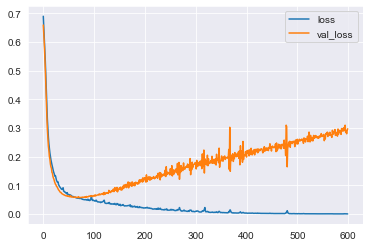

In [48]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### Significant divergence in errors. Model is sufferring from high variance, overfitting. Performance can be improved.

### 3.5 Create Neural Network Model with Dropout

In [49]:
model = Sequential() # Sequential stack of layers using forward propagation

# Three layer ('densly connected') Neural Network

model.add(Dense(30,activation = 'relu'))      # Layer 1 (Input) - 30 units with Rectified Linear activation function
model.add(Dropout(0.5))                       # Each neuron of layer 1 has a 50% probability of being turned off on each batch

model.add(Dense(30,activation = 'relu'))      # Layer 2 (hidden) - 15 units with Rectified Linear activation function 
model.add(Dropout(0.5))                       # Each neuron of layer 1 has a 50% probability of being turned off on each batch

model.add(Dense(1,activation = 'sigmoid'))   # Layer 3 (Output) - 1 units with Sigmoid activation function (0-1)

model.compile(loss='binary_crossentropy',optimizer='adam')

In [52]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 0s 226us/sample - loss: 0.0295 - val_loss: 0.1796
Epoch 2/600
398/398 [==============================] - 0s 231us/sample - loss: 0.0219 - val_loss: 0.1885
Epoch 3/600
398/398 [==============================] - 0s 251us/sample - loss: 0.0202 - val_loss: 0.1895
Epoch 4/600
398/398 [==============================] - 0s 289us/sample - loss: 0.0180 - val_loss: 0.2031
Epoch 5/600
398/398 [==============================] - 0s 342us/sample - loss: 0.0185 - val_loss: 0.1975
Epoch 6/600
398/398 [==============================] - 0s 309us/sample - loss: 0.0212 - val_loss: 0.1979
Epoch 7/600
398/398 [==============================] - 0s 221us/sample - loss: 0.0189 - val_loss: 0.1994
Epoch 8/600
398/398 [==============================] - 0s 168us/sample - loss: 0.0258 - val_loss: 0.1978
Epoch 9/600
398/398 [==============================] - 0s 224us/sample - loss: 0.0181 - val_loss: 0.2009
Epoch 10/

Epoch 78/600
398/398 [==============================] - 0s 166us/sample - loss: 0.0442 - val_loss: 0.1834
Epoch 79/600
398/398 [==============================] - 0s 229us/sample - loss: 0.0237 - val_loss: 0.1888
Epoch 80/600
398/398 [==============================] - 0s 269us/sample - loss: 0.0299 - val_loss: 0.2071
Epoch 81/600
398/398 [==============================] - 0s 156us/sample - loss: 0.0171 - val_loss: 0.2126
Epoch 82/600
398/398 [==============================] - 0s 151us/sample - loss: 0.0211 - val_loss: 0.2072
Epoch 83/600
398/398 [==============================] - 0s 143us/sample - loss: 0.0329 - val_loss: 0.1920
Epoch 84/600
398/398 [==============================] - 0s 148us/sample - loss: 0.0212 - val_loss: 0.1916
Epoch 85/600
398/398 [==============================] - 0s 146us/sample - loss: 0.0169 - val_loss: 0.1986
Epoch 86/600
398/398 [==============================] - 0s 143us/sample - loss: 0.0254 - val_loss: 0.2030
Epoch 87/600
398/398 [========================

Epoch 155/600
398/398 [==============================] - 0s 136us/sample - loss: 0.0164 - val_loss: 0.2668
Epoch 156/600
398/398 [==============================] - 0s 131us/sample - loss: 0.0140 - val_loss: 0.2610
Epoch 157/600
398/398 [==============================] - 0s 138us/sample - loss: 0.0229 - val_loss: 0.2583
Epoch 158/600
398/398 [==============================] - 0s 131us/sample - loss: 0.0146 - val_loss: 0.2873
Epoch 159/600
398/398 [==============================] - 0s 138us/sample - loss: 0.0179 - val_loss: 0.2674
Epoch 160/600
398/398 [==============================] - 0s 153us/sample - loss: 0.0105 - val_loss: 0.2677
Epoch 161/600
398/398 [==============================] - 0s 136us/sample - loss: 0.0148 - val_loss: 0.2686
Epoch 162/600
398/398 [==============================] - 0s 123us/sample - loss: 0.0181 - val_loss: 0.2777
Epoch 163/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0081 - val_loss: 0.2783
Epoch 164/600
398/398 [==============

398/398 [==============================] - 0s 128us/sample - loss: 0.0405 - val_loss: 0.2331
Epoch 232/600
398/398 [==============================] - 0s 133us/sample - loss: 0.0263 - val_loss: 0.2639
Epoch 233/600
398/398 [==============================] - 0s 141us/sample - loss: 0.0460 - val_loss: 0.1945
Epoch 234/600
398/398 [==============================] - 0s 146us/sample - loss: 0.0175 - val_loss: 0.1887
Epoch 235/600
398/398 [==============================] - 0s 224us/sample - loss: 0.0305 - val_loss: 0.1985
Epoch 236/600
398/398 [==============================] - 0s 211us/sample - loss: 0.0251 - val_loss: 0.2268
Epoch 237/600
398/398 [==============================] - 0s 191us/sample - loss: 0.0213 - val_loss: 0.2356
Epoch 238/600
398/398 [==============================] - 0s 224us/sample - loss: 0.0193 - val_loss: 0.2388
Epoch 239/600
398/398 [==============================] - 0s 201us/sample - loss: 0.0203 - val_loss: 0.2579
Epoch 240/600
398/398 [============================

398/398 [==============================] - 0s 121us/sample - loss: 0.0166 - val_loss: 0.2736
Epoch 308/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0236 - val_loss: 0.2721
Epoch 309/600
398/398 [==============================] - 0s 136us/sample - loss: 0.0125 - val_loss: 0.2798
Epoch 310/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0188 - val_loss: 0.2814
Epoch 311/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0119 - val_loss: 0.2596
Epoch 312/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0184 - val_loss: 0.2551
Epoch 313/600
398/398 [==============================] - 0s 85us/sample - loss: 0.0313 - val_loss: 0.2479
Epoch 314/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0225 - val_loss: 0.2478
Epoch 315/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0115 - val_loss: 0.2465
Epoch 316/600
398/398 [=============================

398/398 [==============================] - 0s 126us/sample - loss: 0.0304 - val_loss: 0.2933
Epoch 384/600
398/398 [==============================] - 0s 148us/sample - loss: 0.0169 - val_loss: 0.3151
Epoch 385/600
398/398 [==============================] - 0s 141us/sample - loss: 0.0226 - val_loss: 0.3124
Epoch 386/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0218 - val_loss: 0.3484
Epoch 387/600
398/398 [==============================] - 0s 136us/sample - loss: 0.0279 - val_loss: 0.3088
Epoch 388/600
398/398 [==============================] - 0s 148us/sample - loss: 0.0417 - val_loss: 0.2721
Epoch 389/600
398/398 [==============================] - 0s 148us/sample - loss: 0.0382 - val_loss: 0.2367
Epoch 390/600
398/398 [==============================] - 0s 126us/sample - loss: 0.0511 - val_loss: 0.2362
Epoch 391/600
398/398 [==============================] - 0s 128us/sample - loss: 0.0281 - val_loss: 0.2555
Epoch 392/600
398/398 [============================

398/398 [==============================] - 0s 106us/sample - loss: 0.0206 - val_loss: 0.3071
Epoch 460/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0202 - val_loss: 0.3087
Epoch 461/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0238 - val_loss: 0.2958
Epoch 462/600
398/398 [==============================] - 0s 111us/sample - loss: 0.0114 - val_loss: 0.3073
Epoch 463/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0164 - val_loss: 0.3067
Epoch 464/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0169 - val_loss: 0.3549
Epoch 465/600
398/398 [==============================] - 0s 113us/sample - loss: 0.0220 - val_loss: 0.3481
Epoch 466/600
398/398 [==============================] - 0s 116us/sample - loss: 0.0227 - val_loss: 0.2764
Epoch 467/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0346 - val_loss: 0.3238
Epoch 468/600
398/398 [============================

398/398 [==============================] - 0s 143us/sample - loss: 0.0105 - val_loss: 0.3091
Epoch 536/600
398/398 [==============================] - 0s 138us/sample - loss: 0.0239 - val_loss: 0.3198
Epoch 537/600
398/398 [==============================] - 0s 158us/sample - loss: 0.0201 - val_loss: 0.3402
Epoch 538/600
398/398 [==============================] - 0s 158us/sample - loss: 0.0361 - val_loss: 0.3244
Epoch 539/600
398/398 [==============================] - 0s 166us/sample - loss: 0.0137 - val_loss: 0.2930
Epoch 540/600
398/398 [==============================] - 0s 163us/sample - loss: 0.0161 - val_loss: 0.2949
Epoch 541/600
398/398 [==============================] - 0s 121us/sample - loss: 0.0126 - val_loss: 0.3049
Epoch 542/600
398/398 [==============================] - 0s 106us/sample - loss: 0.0128 - val_loss: 0.3242
Epoch 543/600
398/398 [==============================] - 0s 101us/sample - loss: 0.0220 - val_loss: 0.3248
Epoch 544/600
398/398 [============================

### 3.5 Evaluate Model Performance with Dropout

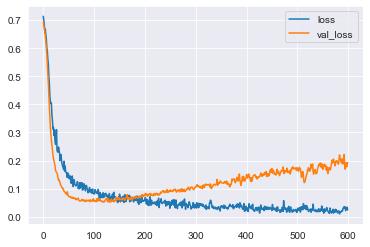

In [51]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### It can be observed that the validation loss and training loss are improved from the previous model. However the errors have diverged too much. Too many epochs have resulted in overfitting. Improvement will now be made using Early Stopping.

### 3.6 Create Neural Network Model with Dropout and Early Stopping

In [53]:
model = Sequential() # Sequential stack of layers using forward propagation

# Three layer ('densly connected') Neural Network

model.add(Dense(30,activation = 'relu'))      # Layer 1 (Input) - 30 units with Rectified Linear activation function
model.add(Dropout(0.5))                       # Each neuron of layer 1 has a 50% probability of being turned off on each batch

model.add(Dense(30,activation = 'relu'))      # Layer 2 (hidden) - 15 units with Rectified Linear activation function 
model.add(Dropout(0.5))                       # Each neuron of layer 1 has a 50% probability of being turned off on each batch

model.add(Dense(1,activation = 'sigmoid'))   # Layer 3 (Output) - 1 units with Sigmoid activation function (0-1)

model.compile(loss='binary_crossentropy',optimizer='adam')

In [54]:
# Import Callbacks for Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
# Early Stopping will stop the training of the model before the validation error begins to increases.
# If the validation loss increases for 25 epochs (patience), this is necessary due to noise induced by dropout.

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [56]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Train on 398 samples, validate on 171 samples
Epoch 1/600
398/398 [==============================] - 1s 2ms/sample - loss: 0.7123 - val_loss: 0.6920
Epoch 2/600
398/398 [==============================] - 0s 236us/sample - loss: 0.7090 - val_loss: 0.6714
Epoch 3/600
398/398 [==============================] - 0s 229us/sample - loss: 0.6597 - val_loss: 0.6527
Epoch 4/600
398/398 [==============================] - 0s 241us/sample - loss: 0.6556 - val_loss: 0.6349
Epoch 5/600
398/398 [==============================] - 0s 219us/sample - loss: 0.6313 - val_loss: 0.6145
Epoch 6/600
398/398 [==============================] - 0s 186us/sample - loss: 0.6289 - val_loss: 0.5914
Epoch 7/600
398/398 [==============================] - 0s 176us/sample - loss: 0.6151 - val_loss: 0.5716
Epoch 8/600
398/398 [==============================] - 0s 209us/sample - loss: 0.5842 - val_loss: 0.5490
Epoch 9/600
398/398 [==============================] - 0s 186us/sample - loss: 0.5793 - val_loss: 0.5229
Epoch 10/60

Epoch 78/600
398/398 [==============================] - 0s 153us/sample - loss: 0.1129 - val_loss: 0.0683
Epoch 79/600
398/398 [==============================] - 0s 156us/sample - loss: 0.1060 - val_loss: 0.0660
Epoch 80/600
398/398 [==============================] - 0s 131us/sample - loss: 0.0842 - val_loss: 0.0667
Epoch 81/600
398/398 [==============================] - 0s 133us/sample - loss: 0.1055 - val_loss: 0.0617
Epoch 82/600
398/398 [==============================] - 0s 136us/sample - loss: 0.0948 - val_loss: 0.0603
Epoch 83/600
398/398 [==============================] - 0s 131us/sample - loss: 0.1122 - val_loss: 0.0605
Epoch 84/600
398/398 [==============================] - 0s 126us/sample - loss: 0.1055 - val_loss: 0.0606
Epoch 85/600
398/398 [==============================] - 0s 133us/sample - loss: 0.1114 - val_loss: 0.0632
Epoch 86/600
398/398 [==============================] - 0s 131us/sample - loss: 0.1109 - val_loss: 0.0701
Epoch 87/600
398/398 [========================

### 3.7 Evaluating Model Performance with Dropout and Early Stopping

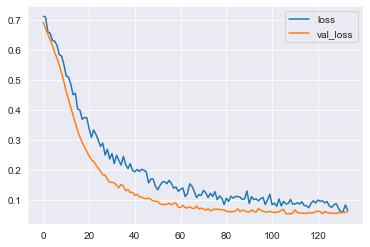

In [59]:
losses = pd.DataFrame(model.history.history)
losses.plot()

#### It can now be observed that the training loss ~= validation loss which is indicates a good fitting model (low variance)

In [65]:
predictions = model.predict_classes(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        68
           1       0.97      1.00      0.99       103

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [68]:
print(confusion_matrix(y_test,predictions))

[[ 65   3]
 [  0 103]]


#### Classification report shows that an accuracy of 98% was achieved and Confusion Matrix shows that only 3 examples were incorrecly classified.